In [6]:
from rdkit.Chem import rdChemReactions
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import Chem
import numpy as np
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit.DataStructs import ConvertSparseIntVectToNumpyArray

In [7]:
combined_df = pd.read_csv('../data/processed/combined_data.csv')

In [30]:
import pandas as pd
import numpy as np
from rdkit.Chem import rdChemReactions
from rdkit import DataStructs

# Function to calculate reaction fingerprint
from rdkit.Chem import rdChemReactions
from rdkit import DataStructs
import numpy as np

def calculate_reaction_fingerprint(reactant_smiles_list, product_smiles_list):
    # Create reaction SMILES
    reactant_smiles = '.'.join(reactant_smiles_list)
    product_smiles = '.'.join(product_smiles_list)
    rxn_smiles = reactant_smiles + '>>' + product_smiles
    try:
        rxn = rdChemReactions.ReactionFromSmarts(rxn_smiles, useSmiles=True)
        if rxn is None or rxn.GetNumReactantTemplates() == 0 or rxn.GetNumProductTemplates() == 0:
            raise ValueError("Invalid reaction SMILES")
    except Exception as e:
        print(f"Error processing reaction: {rxn_smiles}\n{e}")
        # Return a zero vector of a fixed size
        return np.zeros((2048,), dtype=int)
    
    # Generate reaction fingerprint
    fingerprint = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn)
    array = np.zeros((2048,), dtype=int)
    DataStructs.ConvertToNumpyArray(fingerprint, array)
    
    # Return the NumPy array containing the fingerprint data
    return array


In [33]:

# Computing reaction fingerprints
reaction_features = []

for index, row in combined_df.iterrows():
    # Get SMILES lists
    reactant_smiles_list = [row['reactant_0'], row['reactant_1']]
    product_smiles_list = [row['product_0'], row['product_1']]

    # Get reaction descriptor
    reaction_descriptor = calculate_reaction_fingerprint(reactant_smiles_list, product_smiles_list)
    reaction_features.append(reaction_descriptor)

# Convert to NumPy array
reaction_fingerprints_array = np.array(reaction_features)
print(f"Reaction fingerprints array shape: {reaction_fingerprints_array.shape}")


[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION W

Reaction fingerprints array shape: (1867, 2048)


[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION WARNING: please use AtomPairGenerator
[23:48:53] DEPRECATION W

In [ ]:
# Apply t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)
tsne_components = tsne.fit_transform(reaction_fingerprints_array)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1])
plt.title('Chemical Space of Reactions (t-SNE on Reaction Fingerprints)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.show()

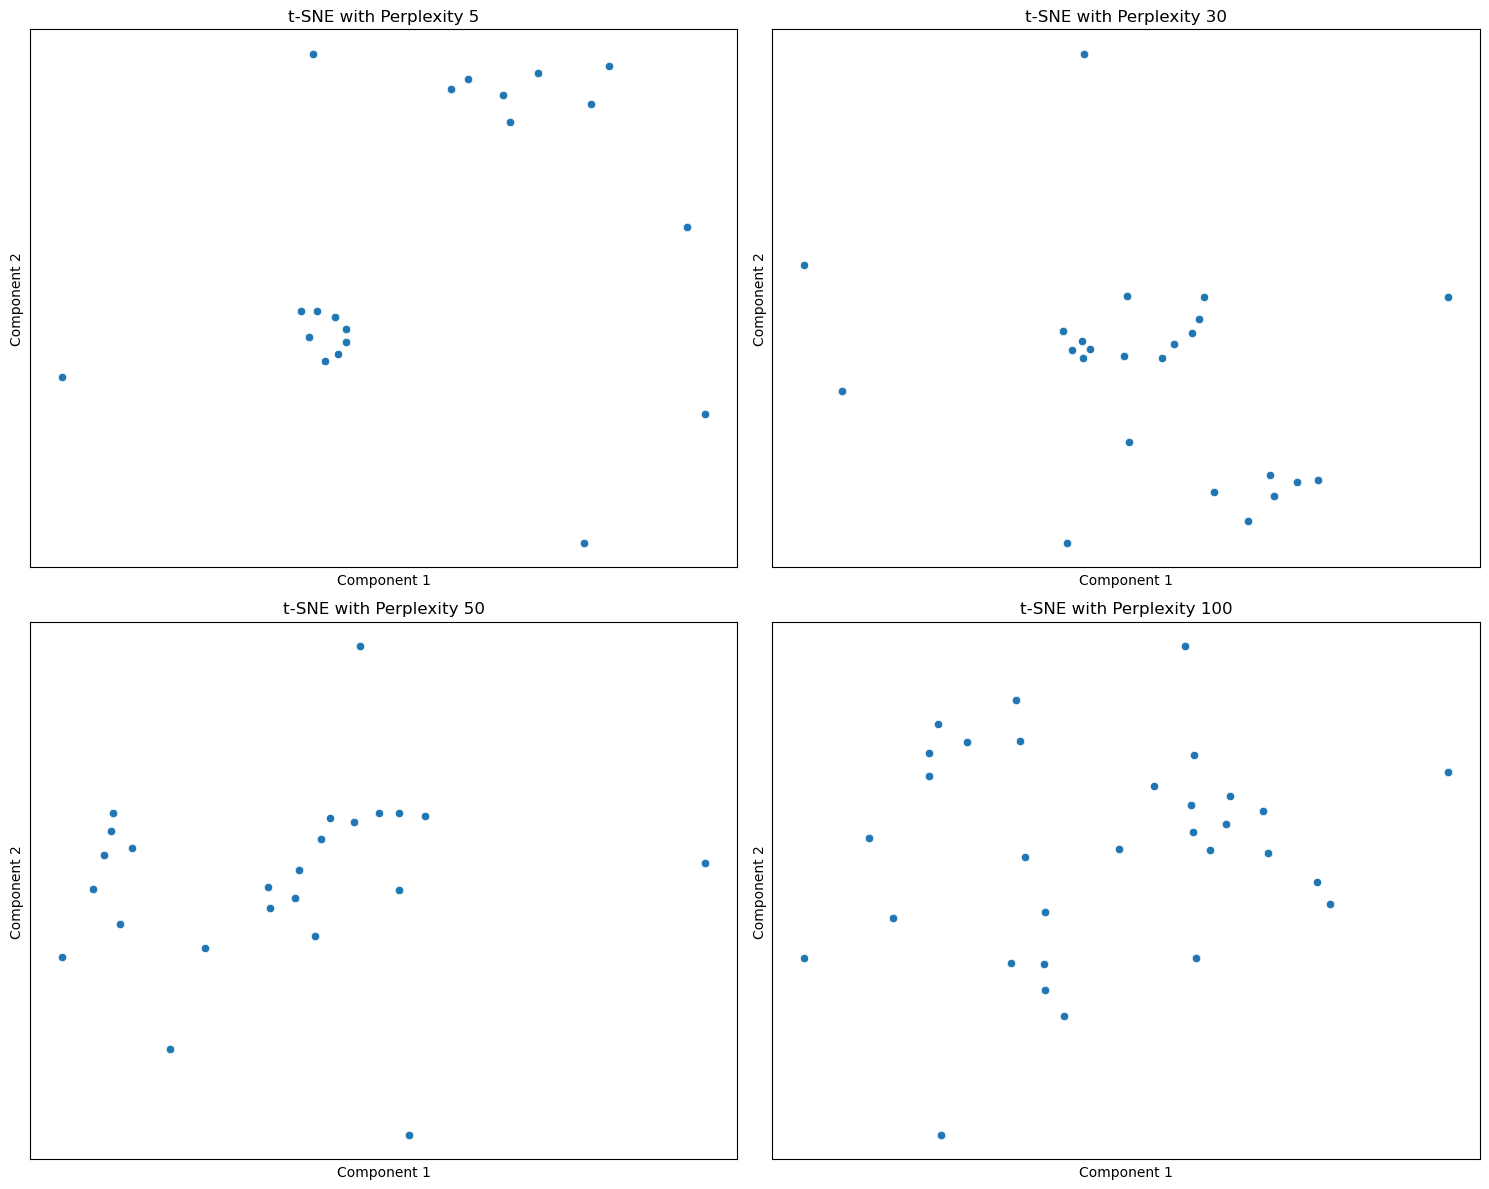

In [38]:
perplexities = [5, 30, 50, 100]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes = axes.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_jobs=-1)
    tsne_components = tsne.fit_transform(reaction_fingerprints_array)
    
    # Plot on the corresponding subplot
    ax = axes[i]
    sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], ax=ax)
    ax.set_title(f't-SNE with Perplexity {perplexity}')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

# Get cluster labels (e.g., using KMeans)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_components)



# Assuming you have cluster labels (e.g., from KMeans)
score = silhouette_score(tsne_components, cluster_labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8952453136444092
